# Term Insurance

The client is a retail banking institution. Term deposits are a major source
of income for a bank.
A term deposit is a cash investment held at a financial institution. Your
money is invested for an agreed rate of interest over a fixed amount of
time, or term.
The bank has various outreach plans to sell term deposits to their
customers such as email marketing, advertisements, telephonic marketing
and digital marketing.
Telephonic marketing campaigns still remain one of the most effective way
to reach out to people. However, they require huge investment as large call
centers are hired to actually execute these campaigns. Hence, it is crucial
to identify the customers most likely to convert beforehand so that they can
be specifically targeted via call.


Problem Statement: To predict if
the client will subscribe to term deposit.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
train=pd.read_csv('train.csv')

In [3]:
test=pd.read_csv('test.csv')

In [4]:
train.shape, test.shape

((31647, 18), (13564, 17))

In [5]:
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [6]:
test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

The column "subscribed" is missing in the test data set so it is our Target variable.

In [7]:
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [8]:
train.dtypes



ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [9]:
train.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [10]:
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [11]:
test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

There are no missing values in the Test and Train data set

# Univariate Analysis

In [12]:
train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

In [13]:
train['subscribed'].value_counts(normalize=True)

no     0.882611
yes    0.117389
Name: subscribed, dtype: float64

<AxesSubplot:>

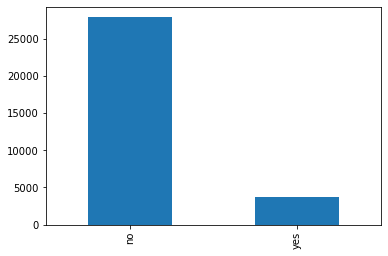

In [14]:
train['subscribed'].value_counts().plot.bar()

<AxesSubplot:ylabel='Frequency'>

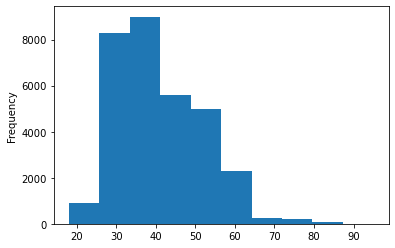

In [15]:
train['age'].plot.hist()

here we can observe that the most of the clients fall in the range of 20-60.
Now we will look at the different jobs people have

<AxesSubplot:>

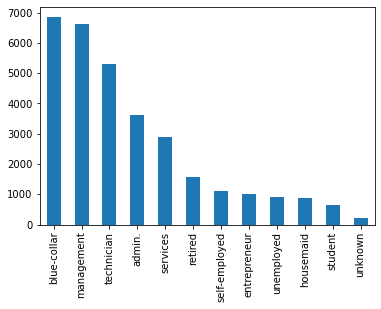

In [16]:
train['job'].value_counts().plot.bar()

Here we observe that the most of the clients belong to the blue collar job and students are least in numbers as students generally dont invest in term desposits.
Now we will take a look at the default history of client.

<AxesSubplot:>

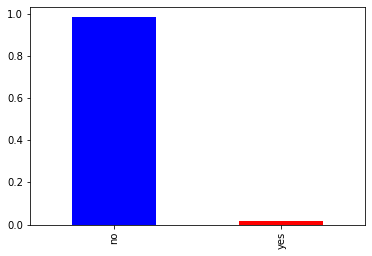

In [17]:
train['default'].value_counts(normalize=True).plot.bar(color=['blue','red'])

More than 90% of the clients have no default history.

# BIVARIATE ANALYSIS

subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


<AxesSubplot:xlabel='job'>

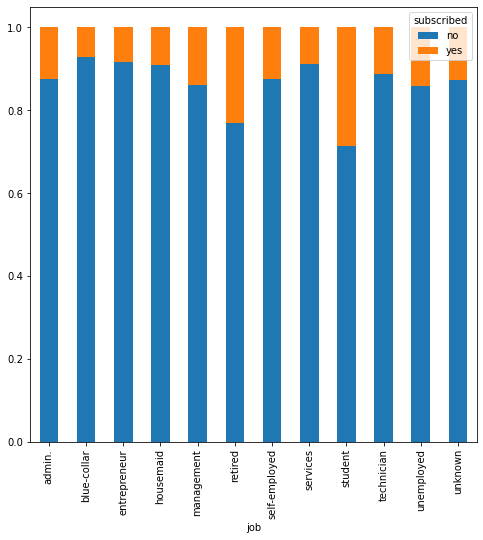

In [18]:
print(pd.crosstab(train['job'],train['subscribed']))
job=pd.crosstab(train['job'],train['subscribed'])
job.div(job.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(8,8))


From the above graph we can infer that students and retired people have the higher chances of subscribing in term insurance, but this may be because the number of students in the dataset is less compared to other variables. 

subscribed     no   yes
default                
no          27388  3674
yes           544    41


<AxesSubplot:xlabel='default'>

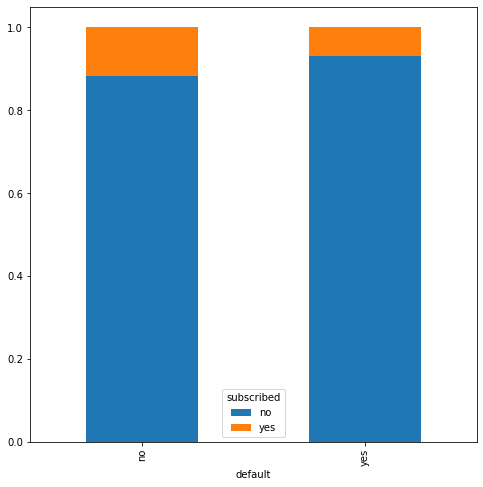

In [19]:
print(pd.crosstab(train['default'],train['subscribed']))
default=pd.crosstab(train['default'],train['subscribed'])
default.div(default.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(8,8))


subscribed     no   yes
education              
primary      4381   427
secondary   14527  1697
tertiary     7886  1415
unknown      1138   176


<AxesSubplot:xlabel='education'>

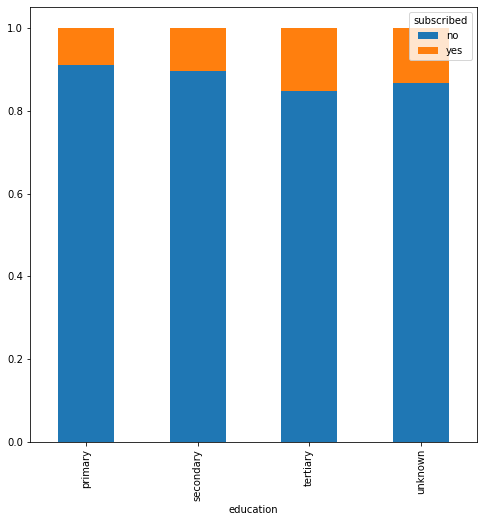

In [20]:
print(pd.crosstab(train['education'],train['subscribed']))
education=pd.crosstab(train['education'],train['subscribed'])
education.div(education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(8,8))


Now we will look at the correlation between the variables.

In [21]:
train['subscribed'].replace('no',0,inplace=True)
train['subscribed'].replace('yes',1,inplace=True)

<AxesSubplot:>

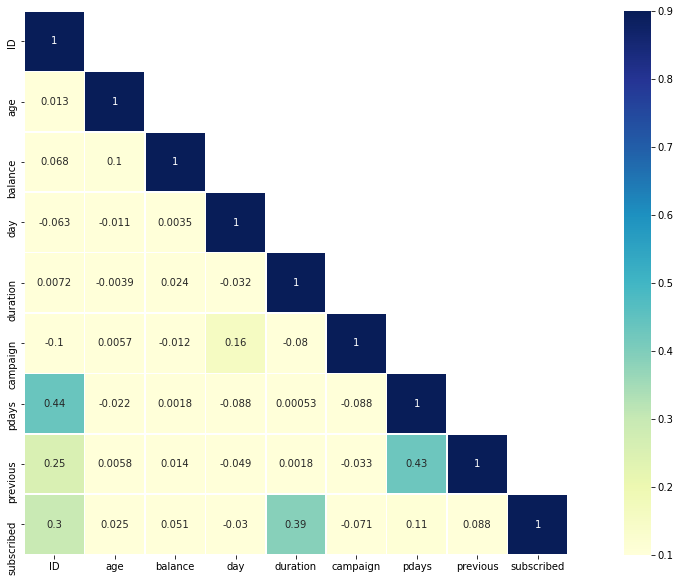

In [22]:
corr=train.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
plt.subplots(figsize=(20,10))
sns.heatmap(corr,vmin=0.1,vmax=0.9,cmap='YlGnBu',annot=True,square=True,linewidths=0.5,mask=mask)

Here we can infer that the duration of call is highly correlated to the subscribed variable.As the duration of the call is more , there are higher chances that client is showing interest in term deposit and hence there are higher chances that they will subscribe in  term deposit.

# MODEL BUILDING

In [23]:
xtrain=train.drop(['subscribed','ID'],1)

ytrain=train['subscribed']

In [24]:
xtrain=pd.get_dummies(xtrain)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_val,y_train,y_val=train_test_split(xtrain,ytrain,test_size=0.2,random_state=12)

In [27]:
logr=LogisticRegression()

In [28]:
logr.fit(x_train,y_train)

LogisticRegression()

In [29]:
pred=logr.predict(x_val)

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
accuracy_score(y_val,pred)

0.8928909952606635

We have got the accuracy score of 89.28%.
Now we will use DecisionTree to check if we can get better score.

In [32]:
from sklearn.tree import DecisionTreeClassifier


In [33]:
dt=DecisionTreeClassifier(max_depth=10,random_state=0)

In [34]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [35]:
dt_pred=dt.predict(x_val)

In [36]:
accuracy_score(y_val,dt_pred)

0.8966824644549763

Here we got the accuracy score of around 89.66%.

In [37]:
test_data=pd.get_dummies(test)

In [38]:
test_data=test_data.drop('ID',1)
prediction=dt.predict(test_data)

In [39]:
Submission=pd.DataFrame()

In [40]:
Submission['ID']=test['ID']

In [41]:
Submission['subscribed']=prediction

In [42]:
Submission['subscribed'].replace(0,'no',inplace=True)
Submission['subscribed'].replace(1,'yes',inplace=True)

In [43]:
Submission.to_csv('submission_classification.csv',header=True,index=False)